In [8]:
# Original crash:
#   DCD node 82-- sucking dry because bathy is bad (probably).
#   check DEMS.
# Now checking for general depth/wetting and why the amplitude and phase
# are so off.
import matplotlib.pyplot as plt
import stompy.model.delft.dflow_model as dfm
import stompy.model.hydro_model as hm
import xarray as xr
import pandas as pd
import numpy as np
%matplotlib notebook

In [9]:
run_dir="data_2d_2019_summer-v015"
model=dfm.DFlowModel.load(run_dir)

# There's a cell in the Undine portion of Old River that is responsible for
# all of the step limitations.
# Salinity is 32.0 everywhere, slightly higher at ocean BC.
# Nearly 1m/s ucmag-avg in the neighborhood.  Is this a DCD issue?
# Maybe I forgot to scale units on DCD? Fixed that.
# I think the issue now is that there is extraction along that channel
# but the resolution so low that it's not hydraulically connected and fairly
# quick runs out of water.

# DEM doesn't look awful...
# But it does look quite shallow around here.
# Could be an issue with BedLevType?
# or just need smarter bathy setting? was already 6, which is decent.
# changed bedlevtype and bathy setting to follow pescadero. fingers crossed.


/home/rustyh/src/stompy/stompy/grid/unstructured_grid.py:1133: RuntimeWarning: invalid value encountered in cast
  cells=cells.astype(np.int32)


In [10]:
map_ds=model.map_dataset()

In [11]:
list(map_ds)

['projected_coordinate_system',
 'mesh2d',
 'mesh2d_node_z',
 'mesh2d_edge_nodes',
 'mesh2d_face_nodes',
 'mesh2d_edge_faces',
 'mesh2d_face_x_bnd',
 'mesh2d_face_y_bnd',
 'mesh2d_edge_type',
 'mesh2d_flowelem_ba',
 'mesh2d_flowelem_bl',
 'mesh2d_flowelem_domain',
 'mesh2d_flowelem_globalnr',
 'timestep',
 'mesh2d_Numlimdt',
 'mesh2d_s1',
 'mesh2d_s0',
 'mesh2d_waterdepth',
 'mesh2d_u1',
 'mesh2d_u0',
 'mesh2d_ucx',
 'mesh2d_ucy',
 'mesh2d_ucmag',
 'mesh2d_q1',
 'mesh2d_viu',
 'mesh2d_diu',
 'mesh2d_taus',
 'mesh2d_czs',
 'mesh2d_czu',
 'mesh2d_sa1']

In [12]:
map_ds.time

<xarray.DataArray 'time' (time: 1465)>
array(['2019-04-01T00:00:00.000000000', '2019-04-01T01:00:00.000000000',
       '2019-04-01T02:00:00.000000000', ..., '2019-05-31T22:00:00.000000000',
       '2019-05-31T23:00:00.000000000', '2019-06-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2019-04-01 2019-04-01T01:00:00 ... 2019-06-01
Attributes:
    standard_name:  time

In [13]:
%matplotlib notebook

<IPython.core.display.Javascript object>


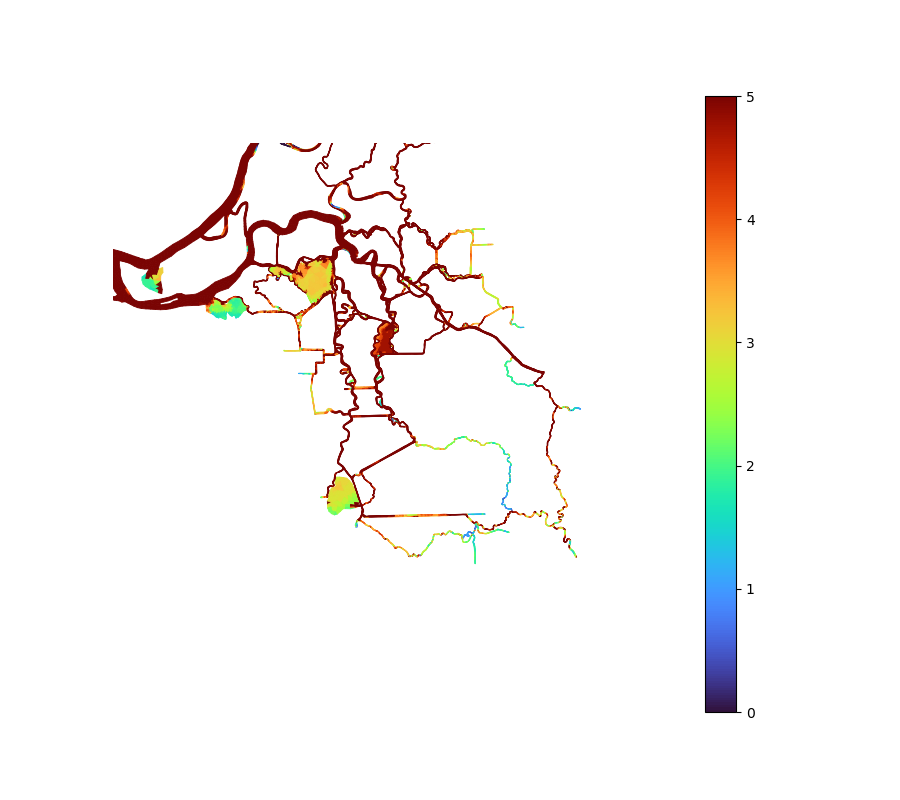

In [7]:
fig,ax=plt.subplots(figsize=(9,8))

scal=map_ds['mesh2d_waterdepth'].isel(time=-1).values

ccoll=map_ds.grid.plot_cells(values=scal,cmap='turbo',ax=ax,lw=0.6,edgecolor='face')
plt.colorbar(ccoll)
ax.axis('off')
ccoll.set_clim([0,5])
fig ;

In [ ]:
map_ds

<IPython.core.display.Javascript object>


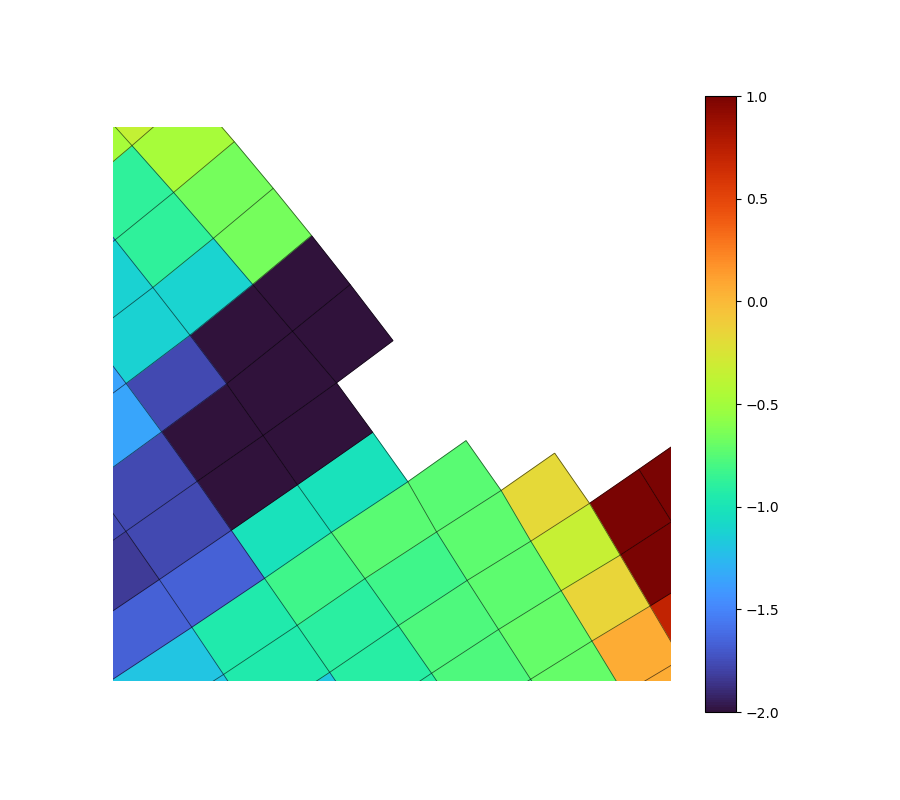

In [16]:
# Checking on bed elevation - is it possible that the entire domain is too deep?
fig,ax=plt.subplots(figsize=(9,8))

scal=map_ds['mesh2d_flowelem_bl'].values

ccoll=map_ds.grid.plot_cells(values=scal,cmap='turbo',ax=ax,lw=0.6,edgecolor='face')
map_ds.grid.plot_edges(color='k',lw=0.6,alpha=0.6)
plt.colorbar(ccoll)
ax.axis('off')
ccoll.set_clim([-2,1])
fig ;